# Deep Learning - Autoencoder

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
# Set parameters
image_length = 784
encoding_dim = 200
encoding_dim_2 = 45

train_size = 15000
validation_size = 5000

## Importing data
We import the data with Pandas and then convert these to NumPy arrays. Since the pixel values range between 0 and 255, we may need to convert them to percentage white versus black. We do this by dividing by 255.

In [ ]:
# Import and convert data to percentage points (divide by 255, the max gray scale value)
x_train = pd.read_csv("data/mnist_train.csv", header = None)
y_train = x_train.loc[:, 0].to_numpy()
x_train = x_train.loc[:, 1:].to_numpy()
x_train = x_train.astype('float32') / 255.

x_test = pd.read_csv("data/mnist_test.csv", header = None)
y_test = x_test.loc[:, 0].to_numpy()
x_test = x_test.loc[:, 1:].to_numpy()
x_test = x_test.astype('float32') / 255.

After this, we split the train data since we need to keep the test set separate for the final part. We take the first 15,000 images for training, the next 5,000 for validation, and the rest for testing the autoencoding part.

In [ ]:
# Take samples for training and testing. Note that we cannot take the test set yet, as we will use this when the
# full network is completed in R
x_validation = x_train[train_size:(train_size+validation_size), :]
x_train_input = x_train[(train_size+validation_size):, :]
x_train = x_train[:train_size, :]
y_train_input = y_train[(train_size+validation_size):]
y_validation = y_train[train_size:(train_size+validation_size)]

Lastly, we convert single labels into one-hot encoded variables (e.g. the label "5" is now converted to the 5th unit vector).

In [3]:
# Create one-hot-encoded versions of the data
y_train_input_ohe = to_categorical(y_train_input)
y_validation_ohe = to_categorical(y_validation)
y_test_ohe = to_categorical(y_test)

## Create autoencoder
We first create an autoencoder that is abkle to reduce an image of length 784 to 45 features. The warning can be ignored (for now) as it is a deprecation warning.

In [4]:
input_img = Input(shape = (image_length,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim_2, activation='relu')(encoded)

decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(image_length, activation='sigmoid')(decoded)

encoder = Model(input_img, encoded)

Instructions for updating:
Colocations handled automatically by placer.


We then perform a grid search for the best number of epochs and batch size. In the first iteration, with possible epochs 11, 12, and 13 and possible batch sizes 32, 64, 128, 256, we find that 12 epochs is deemed optimal with batch size 128, usually closely followed by 13 epochs and batch size 64. As such, we run another grid search for possible epochs 12 up to 20 and possible batch sizes 64 and 128.

In [5]:
# Grid Search - after finding epochs=12 and batch_size=128 was the best
best_acc = 0

for epoch in range(12, 21):
    print(f"Epochs: {epoch}")
    for batch_size in [64, 128]:
        print(f"Batch size: {batch_size}")
        
        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        history = autoencoder.fit(x_train, x_train,
                          epochs=epoch, batch_size=batch_size,
                          shuffle=True, verbose = 0,
                          validation_data=(x_validation, x_validation))
        
        if (history.history['loss'][-1] > history.history['val_loss'][-1]):
            print("Overfitting!")
            next
            
        validation_acc = history.history['val_acc'][-1]
        
        if (validation_acc > best_acc):
            best_acc = validation_acc
            best_epoch = epoch
            best_batch_size = batch_size
            
print(f"Best accuracy: {best_acc}, best epochs: {best_epoch}, best batch_size: {best_batch_size}")

Epochs: 12
Batch size: 64
Instructions for updating:
Use tf.cast instead.
Batch size: 128
Epochs: 13
Batch size: 64
Batch size: 128
Epochs: 14
Batch size: 64
Batch size: 128
Epochs: 15
Batch size: 64
Batch size: 128
Epochs: 16
Batch size: 64
Batch size: 128
Epochs: 17
Batch size: 64
Batch size: 128
Epochs: 18
Batch size: 64
Batch size: 128
Epochs: 19
Batch size: 64
Batch size: 128
Best accuracy: 0.8133102106094361, best epochs: 19, best batch_size: 128


The parameters found in this grid search are then used to train the autoencoder.

In [6]:
# Use best parameters found above
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
history = autoencoder.fit(x_train, x_train,
                          epochs=best_epoch, batch_size=best_batch_size,
                          shuffle=True, verbose = 2,
                          validation_data=(x_validation, x_validation))

Train on 5000 samples, validate on 5000 samples
Epoch 1/19
 - 4s - loss: 0.0742 - acc: 0.8153 - val_loss: 0.0853 - val_acc: 0.8133
Epoch 2/19
 - 1s - loss: 0.0721 - acc: 0.8154 - val_loss: 0.0851 - val_acc: 0.8132
Epoch 3/19
 - 1s - loss: 0.0721 - acc: 0.8154 - val_loss: 0.0853 - val_acc: 0.8133
Epoch 4/19
 - 1s - loss: 0.0722 - acc: 0.8154 - val_loss: 0.0854 - val_acc: 0.8133
Epoch 5/19
 - 1s - loss: 0.0722 - acc: 0.8154 - val_loss: 0.0852 - val_acc: 0.8133
Epoch 6/19
 - 1s - loss: 0.0722 - acc: 0.8154 - val_loss: 0.0855 - val_acc: 0.8133
Epoch 7/19
 - 1s - loss: 0.0722 - acc: 0.8154 - val_loss: 0.0857 - val_acc: 0.8133
Epoch 8/19
 - 1s - loss: 0.0723 - acc: 0.8154 - val_loss: 0.0858 - val_acc: 0.8133
Epoch 9/19
 - 1s - loss: 0.0723 - acc: 0.8154 - val_loss: 0.0859 - val_acc: 0.8133
Epoch 10/19
 - 1s - loss: 0.0723 - acc: 0.8154 - val_loss: 0.0857 - val_acc: 0.8132
Epoch 11/19
 - 1s - loss: 0.0723 - acc: 0.8154 - val_loss: 0.0856 - val_acc: 0.8133
Epoch 12/19
 - 1s - loss: 0.0723 - ac

Now that the autoencoder is trained, we want to get a bit of insight into how it is encoding and decoding data. This is plotted below.

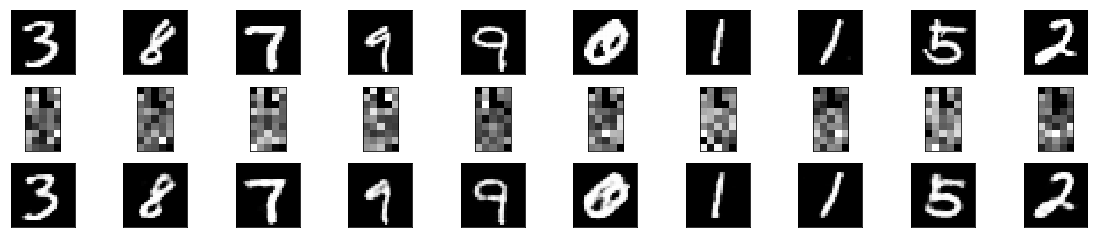

In [7]:
# Plot images
encoded_images = encoder.predict(x_train_input)
decoded_images = autoencoder.predict(x_train_input)

plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_train_input[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_images[i].reshape(9,5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display decoded images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Adding the ANN
Now that the autoencoding part is done, we add the ANN part from exercise 4. We start with only the "encoding" part of the autoencoder, indicated by `autoencoder.layers[-3].output`.

In [8]:
full_model = Model(autoencoder.input, autoencoder.layers[-3].output)
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 45)                9045      
Total params: 166,045
Trainable params: 166,045
Non-trainable params: 0
_________________________________________________________________


We now take the number of hidden nodes as we chose in Exercise 4, being 20. Then, we add a hidden layer `layer_1` with this number of nodes to the network., after which we add an output layer, being `layer_2`.

In [9]:
H = 20 # H = 20 from exercise 4

layer_1 = Dense(H, activation='relu')(full_model.layers[-1].output)
layer_2 = Dense(10, activation = 'softmax')(layer_1)
full_model = Model(input_img, layer_2)
full_model.summary()
full_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 45)                9045      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 167,175
Trainable params: 167,175
Non-trainable params: 0
_________________________________________________________________


Finally, the model is fitted on the training data.

In [10]:
history = full_model.fit(x_train_input, y_train_input_ohe,
                         epochs=15, batch_size=best_batch_size,
                         shuffle=True, verbose=2,
                         validation_data=(x_validation, y_validation_ohe))

Train on 50000 samples, validate on 5000 samples
Epoch 1/19
 - 6s - loss: 0.1122 - acc: 0.9629 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 2/19
 - 4s - loss: 0.0321 - acc: 0.9894 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 3/19
 - 4s - loss: 0.0221 - acc: 0.9927 - val_loss: 0.0279 - val_acc: 0.9905
Epoch 4/19
 - 4s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0213 - val_acc: 0.9930
Epoch 5/19
 - 4s - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0223 - val_acc: 0.9928
Epoch 6/19
 - 4s - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0195 - val_acc: 0.9936
Epoch 7/19
 - 3s - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0209 - val_acc: 0.9935
Epoch 8/19
 - 4s - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0206 - val_acc: 0.9937
Epoch 9/19
 - 4s - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0211 - val_acc: 0.9934
Epoch 10/19
 - 4s - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0197 - val_acc: 0.9943
Epoch 11/19
 - 4s - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0203 - val_acc: 0.9937
Epoch 12/19
 - 4s - loss: 0.0033 - a

Lastly, we want to visualise our results. After fitting it for 19 epochs (from the grid search earlier), it looks like it is overfitting after 15 epochs (so we adjusted it above). As such, the plots below are made for a maximum epochs number of 15.

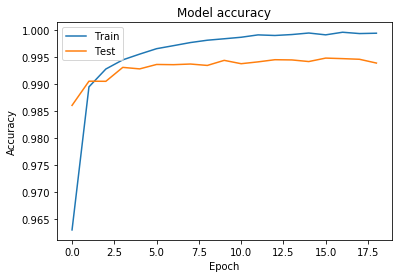

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

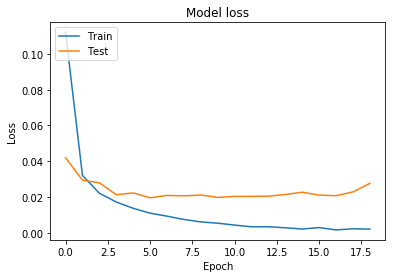

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As a final touch, we want to know the accuracy of our model on the test set:

In [13]:
evals = full_model.evaluate(x_test, y_test_ohe)
print(f"Accuracy on the test set: {evals[1]}")

10000/10000 [==============================] - 1s 88us/step
Accuracy on the test set: 0.9948699989318848
